# Analiza i vizualizacija
## Housing affordability in the EU


In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect("../data/processed/app.db")

df = pd.read_sql("SELECT * FROM integrated_metrics", conn)
conn.close()

df.head()


,iso3,year,hpi,avg_wage,wage_index,price_to_income_index
0,AUT,2015,78.473333,55987.315667,100.000000,78.473333
1,AUT,2016,84.100000,56722.783667,101.313633,83.009559
2,AUT,2017,86.998889,56973.127000,101.760776,85.493539
3,AUT,2018,92.338889,57473.624333,102.654724,89.950940
4,AUT,2019,97.838889,58205.884333,103.962627,94.109673


Provjera putanje:

In [8]:
import os
os.getcwd()


'C:\\Users\\gudel\\OneDrive\\Radna površina\\housing-affordability-eu\\notebooks'

## **Graf 1: Kretanje prosječnog indeksa cijena stambenih nekretnina i plaća u EU**


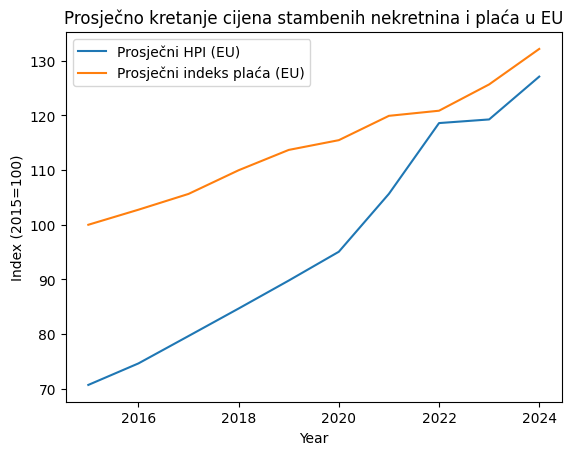

In [9]:
eu = (
    df.groupby("year", as_index=False)
      .agg({
          "hpi": "mean",
          "wage_index": "mean"
      })
)

plt.figure()
plt.plot(eu["year"], eu["hpi"], label="Prosječni HPI (EU)")
plt.plot(eu["year"], eu["wage_index"], label="Prosječni indeks plaća (EU)")
plt.xlabel("Year")
plt.ylabel("Index (2015=100)")
plt.title("Prosječno kretanje cijena stambenih nekretnina i plaća u EU")
plt.legend()
plt.show()


Graf prikazuje kretanje prosječnog indeksa cijena stambenih nekretnina (HPI) i prosječnog indeksa plaća u državama Europske unije kroz vrijeme (godine).

Oba indeksa su normalizirana na baznu godinu 2015** (=100), što omogućuje izravnu usporedbu relativnih promjena između cijena nekretnina i plaća.

Vrijednosti su dobivene kao aritmetički prosjek svih država EU po godini, koristeći:
- HPI podatke iz Eurostata (CSV)
- indeks plaća iz OECD-a (JSON API)

Za svaku godinu iz integriranog skupa podataka:
- izračunat je EU prosjek HPI-a
- izračunat je EU prosjek indeksa plaća (wage_index)

Podaci su prethodno integrirani i pohranjeni u bazu podataka, a zatim agregirani grupiranjem po godini.

Graf pokazuje da indeks plaća bilježi postupan i relativno stabilan rast tijekom cijelog promatranog razdoblja.  
S druge strane, indeks cijena nekretnina (HPI) raste znatno brže, osobito nakon 2020. godine.

Razlika između dvije krivulje se s vremenom povećava, što ukazuje na to da cijene nekretnina rastu brže od plaća na razini EU.  
Posebno je uočljiv ubrzani rast HPI-a nakon 2021. godine, dok rast plaća ostaje umjereniji. Zaključno, graf pokazuje da se na razini Europske unije dostupnost stanovanja pogoršava, jer rast cijena nekretnina nadmašuje rast plaća.


## **Graf 2: Kretanje indeksa pristupačnosti stanovanja u Hrvatskoj u usporedbi s EU prosjekom**


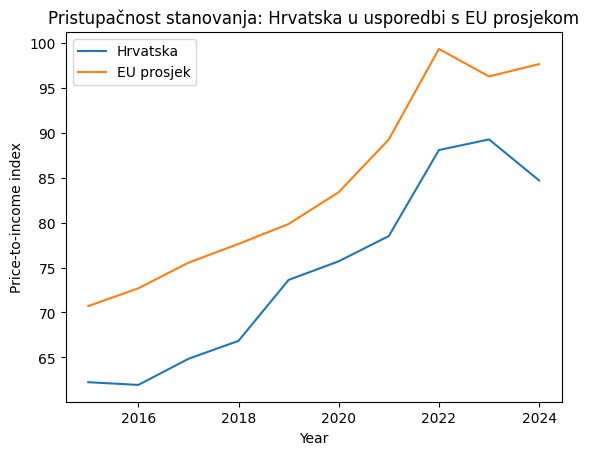

In [10]:
hrv = df[df["iso3"] == "HRV"]

eu_aff = (
    df.groupby("year", as_index=False)["price_to_income_index"]
      .mean()
      .rename(columns={"price_to_income_index": "eu_aff"})
)

merged = hrv.merge(eu_aff, on="year")

plt.figure()
plt.plot(merged["year"], merged["price_to_income_index"], label="Hrvatska")
plt.plot(merged["year"], merged["eu_aff"], label="EU prosjek")
plt.xlabel("Year")
plt.ylabel("Price-to-income index")
plt.title("Pristupačnost stanovanja: Hrvatska u usporedbi s EU prosjekom")
plt.legend()
plt.show()


Graf prikazuje kretanje indeksa dostupnosti stanovanja (price-to-income index) za Hrvatsku u usporedbi s prosjekom Europske unije kroz promatrano razdoblje.

Indeks dostupnosti stanovanja definiran je kao omjer indeksa cijena stambenih nekretnina i indeksa plaća, pri čemu više vrijednosti ukazuju na lošiju dostupnost stanovanja.

Analiza je provedena korištenjem integriranih podataka iz Eurostata i OECD-a. Za Hrvatsku su izdvojeni zapisi prema ISO oznaci HRV, dok je EU prosjek izračunan kao prosjek svih država članica po godinama. Podaci su spojeni po godini kako bi se omogućila izravna usporedba.

Rezultati pokazuju da Hrvatska tijekom cijelog razdoblja ima niži indeks dostupnosti stanovanja u odnosu na EU prosjek, što upućuje na relativno pristupačnije stanovanje. Međutim, indeks u Hrvatskoj kontinuirano raste, osobito nakon 2018. godine, a nakon 2021. vidljivo je ubrzano pogoršanje dostupnosti.

Iako je indeks dostupnosti u EU i dalje viši, razlika između Hrvatske i EU prosjeka se smanjuje, što ukazuje na postupno približavanje hrvatskog tržišta nekretnina europskim trendovima.


## **Graf 3: Usporedba kretanja indeksa pristupačnosti stanovanja u Hrvatskoj, Njemačkoj i Austriji**


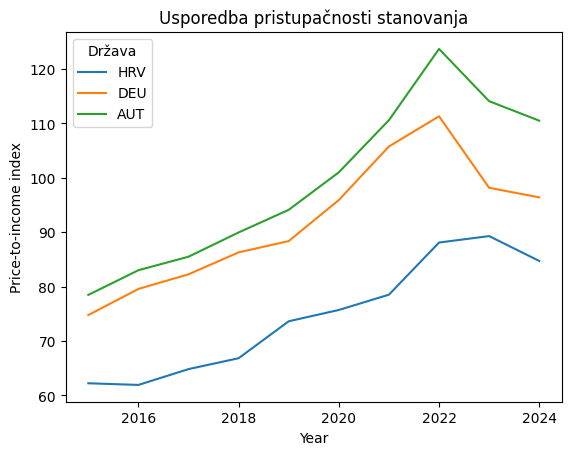

In [11]:
countries = ["HRV", "DEU", "AUT"]

plt.figure()
for c in countries:
    tmp = df[df["iso3"] == c]
    plt.plot(tmp["year"], tmp["price_to_income_index"], label=c)

plt.xlabel("Year")
plt.ylabel("Price-to-income index")
plt.title("Usporedba pristupačnosti stanovanja")
plt.legend(title="Država")
plt.show()


Graf prikazuje kretanje indeksa dostupnosti stanovanja (price-to-income index) za Hrvatsku, Njemačku i Austriju kroz promatrano razdoblje.

Indeks dostupnosti stanovanja mjeri odnos između rasta cijena stambenih nekretnina i rasta plaća, pri čemu više vrijednosti indeksa ukazuju na lošiju dostupnost stanovanja.

Analiza se temelji na integriranim podacima iz Eurostata (HPI) i OECD-a (indeks plaća). Iz skupa podataka izdvojene su tri države prema ISO3 kodovima, a za svaku je prikazano godišnje kretanje indeksa, što omogućuje izravnu usporedbu trendova između zemalja s različitim tržišnim karakteristikama.

Rezultati pokazuju da sve tri države bilježe pogoršanje dostupnosti stanovanja, osobito nakon 2019. godine. Austrija ima najviše vrijednosti indeksa, što upućuje na najnepovoljniji odnos cijena nekretnina i plaća. Njemačka se nalazi između Austrije i Hrvatske, uz izraženo pogoršanje u razdoblju 2020.–2022.

Hrvatska ima najniže vrijednosti indeksa, no bilježi stabilan i kontinuiran rast, što ukazuje na postupno smanjenje razlike u odnosu na razvijenije zemlje.

Oko 2022. godine vidljiv je vrhunac indeksa u sve tri države, što se može povezati s rastom cijena nekretnina, inflacijskim pritiscima i poremećajima na tržištu rada i stanovanja. Nakon tog razdoblja u Njemačkoj i Austriji primjetno je blago poboljšanje, dok Hrvatska zadržava povišene razine indeksa.

Graf potvrđuje da je problem dostupnosti stanovanja prisutan u cijeloj Europi, ali s različitim intenzitetima. Iako Hrvatska i dalje ima relativno povoljniju situaciju, dugoročni trendovi ukazuju na postupno približavanje ostalim europskim tržištima.


## **Graf 4: Raspodjela indeksa pristupačnosti stanovanja u državama EU u odabranim godinama**


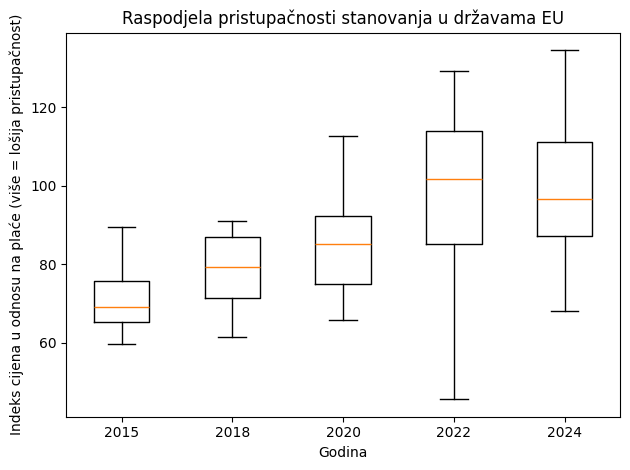

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

years = [2015, 2018, 2020, 2022, int(df["year"].max())]
years = [y for y in years if y in df["year"].unique()]

data = [
    df.loc[df["year"] == y, "price_to_income_index"].dropna().values
    for y in years
]

# plot
plt.figure()
plt.boxplot(
    data,
    tick_labels=years,     
    showfliers=False
)
plt.xlabel("Godina")
plt.ylabel("Indeks cijena u odnosu na plaće (više = lošija pristupačnost)")
plt.title("Raspodjela pristupačnosti stanovanja u državama EU")
plt.tight_layout()
plt.show()


Graf prikazuje raspodjelu indeksa cijena nekretnina u odnosu na plaće (price-to-income index) za države Europske unije u odabranim godinama: 2015., 2018., 2020., 2022. i 2024. Za svaku godinu prikazan je boxplot koji omogućuje uvid u medijan i varijabilnost vrijednosti među državama članicama.

Indeks price-to-income predstavlja omjer cijena stambenih nekretnina i razine plaća, pri čemu više vrijednosti ukazuju na lošiju pristupačnost stanovanja.

Rezultati pokazuju da je u 2015. godini raspodjela indeksa bila relativno uska, uz niže vrijednosti medijana, što upućuje na povoljniju i ujednačeniju stambenu pristupačnost. U kasnijim godinama vidljiv je pomak distribucije prema višim vrijednostima, što znači da je stanovanje postajalo manje pristupačno u većini država.

Nakon 2020. godine dolazi do izraženog povećanja medijana te širenja raspona vrijednosti, što ukazuje na rast nejednakosti u dostupnosti stanovanja među državama članicama.

Analiza potvrđuje da se problem stambene pristupačnosti u Europskoj uniji s vremenom pogoršava te da razlike između država postaju sve izraženije, što naglašava važnost promatranja distribucije podataka, a ne samo prosječnih vrijednosti.


## **Graf 5: Promjena indeksa pristupačnosti stanovanja u državama EU između 2015. i 2024. godine**


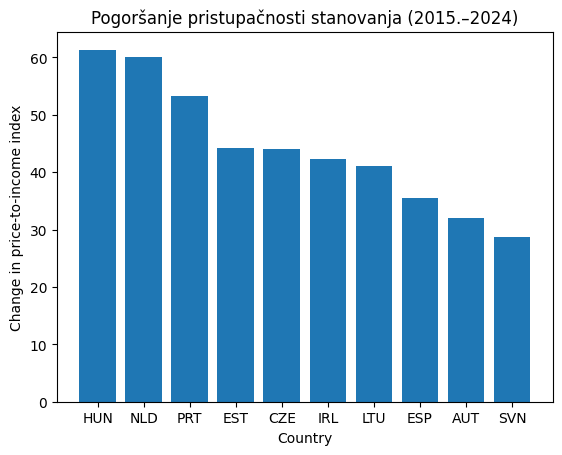

In [13]:
last_year = df["year"].max()

base = df[df["year"] == 2015][["iso3", "price_to_income_index"]]
last = df[df["year"] == last_year][["iso3", "price_to_income_index"]]

change = base.merge(last, on="iso3", suffixes=("_2015", "_last"))
change["delta"] = change["price_to_income_index_last"] - change["price_to_income_index_2015"]

change = change.sort_values("delta", ascending=False).head(10)

plt.figure()
plt.bar(change["iso3"], change["delta"])
plt.xlabel("Country")
plt.ylabel("Change in price-to-income index")
plt.title(f"Pogoršanje pristupačnosti stanovanja (2015.–{last_year})")
plt.show()


Graf prikazuje promjenu indeksa pristupačnosti stanovanja (price-to-income index) za odabrane države Europske unije između 2015. godine, kao bazne godine, i 2024. godine. Za svaku državu prikazana je razlika u vrijednosti indeksa između te dvije godine, pri čemu pozitivne vrijednosti označavaju pogoršanje pristupačnosti stanovanja.

Rezultati pokazuju da je u svim promatranim državama došlo do rasta indeksa, što upućuje na opći trend pogoršanja stambene pristupačnosti u Europskoj uniji.

Najizraženije pogoršanje zabilježeno je u Mađarskoj i Nizozemskoj, dok Portugal i Estonija također bilježe izrazit rast indeksa. S druge strane, Austrija i Slovenija pokazuju relativno blaže pogoršanje, iako je trend i kod njih negativan.

Uočene razlike među državama ukazuju na važnu ulogu nacionalnih čimbenika, poput dinamike tržišta nekretnina, rasta plaća i ekonomskih politika, u oblikovanju pristupačnosti stanovanja.

Graf služi kao sinteza prethodnih analiza, jer sažima dugoročne promjene u odnosu cijena nekretnina i dohotka te naglašava potrebu za ciljanim politikama usmjerenima na ublažavanje pogoršanja stambene pristupačnosti.


## **Graf 6: Prosječno kretanje indeksa pristupačnosti stanovanja u Europskoj uniji**


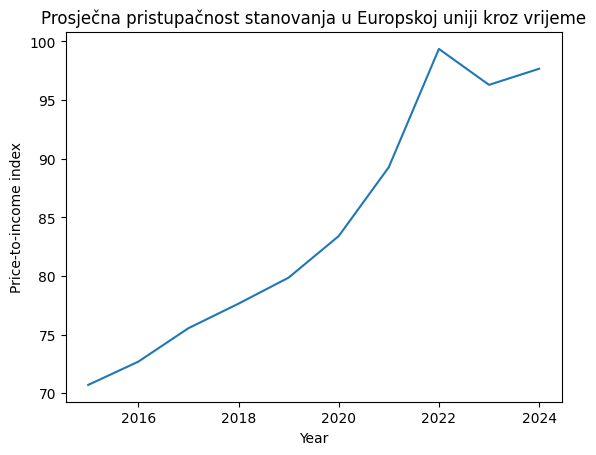

In [14]:
eu_aff = (
    df.groupby("year", as_index=False)["price_to_income_index"]
      .mean()
)

plt.figure()
plt.plot(eu_aff["year"], eu_aff["price_to_income_index"])
plt.xlabel("Year")
plt.ylabel("Price-to-income index")
plt.title("Prosječna pristupačnost stanovanja u Europskoj uniji kroz vrijeme")
plt.show()


Graf prikazuje prosječnu vrijednost indeksa pristupačnosti stanovanja (price-to-income index) za Europsku uniju kroz razdoblje od 2015. do 2024. godine. Vrijednosti su izračunate kao aritmetička sredina svih država članica za svaku godinu, koristeći podatke o cijenama nekretnina iz Eurostata i podatke o plaćama iz OECD-a. Više vrijednosti indeksa označavaju lošiju pristupačnost stanovanja.

Rezultati pokazuju kontinuirani rast indeksa tijekom promatranog razdoblja, što upućuje na postupno pogoršanje pristupačnosti stanovanja u Europskoj uniji. Nakon 2019. godine rast indeksa postaje izraženiji, a najveći skok zabilježen je oko 2021.–2022. godine.

Uočeni trendovi mogu se povezati s ubrzanim rastom cijena nekretnina, sporijim rastom plaća te širim makroekonomskim poremećajima. Iako je nakon 2022. vidljivo blago smirivanje rasta, vrijednosti indeksa ostaju povišene, što ukazuje na dugotrajniji karakter problema.

Graf potvrđuje da je pogoršanje stambene pristupačnosti u Europskoj uniji dugoročan trend te pruža referentnu osnovu za usporedbu pojedinih država s EU prosjekom.


## **Graf 7: Odnos prosječne plaće i indeksa pristupačnosti stanovanja u Hrvatskoj, Njemačkoj i Austriji**


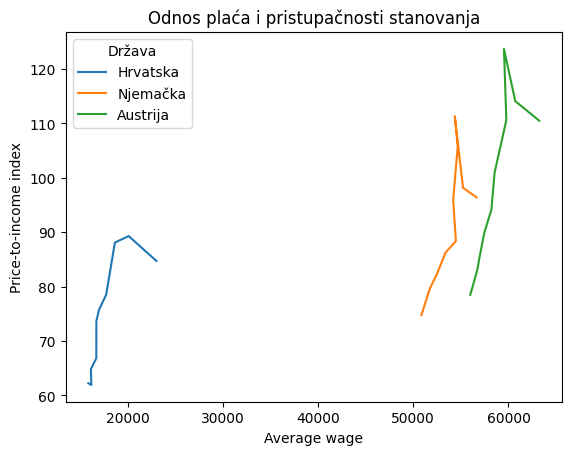

In [15]:
countries = ["HRV", "DEU", "AUT"]

labels_hr = {
    "HRV": "Hrvatska",
    "DEU": "Njemačka",
    "AUT": "Austrija"
}

plt.figure()
for c in countries:
    tmp = df[df["iso3"] == c]
    plt.plot(tmp["avg_wage"], tmp["price_to_income_index"], label=labels_hr[c])

plt.xlabel("Average wage")
plt.ylabel("Price-to-income index")
plt.title("Odnos plaća i pristupačnosti stanovanja")
plt.legend(title="Država")
plt.show()


Graf prikazuje odnos između prosječne godišnje bruto plaće i indeksa pristupačnosti stanovanja (price-to-income index) za Hrvatsku, Njemačku i Austriju. Na x-osi prikazane su plaće prema podacima OECD-a, dok y-os predstavlja integrirani pokazatelj temeljen na podacima o cijenama nekretnina (Eurostat) i plaćama (OECD). Svaka linija odgovara jednoj državi, a točke na liniji predstavljaju pojedine godine promatranog razdoblja.

Rezultati pokazuju pozitivan odnos između rasta plaća i vrijednosti indeksa u sve tri države, što upućuje na to da rast dohotka ne jamči poboljšanje pristupačnosti stanovanja. U mnogim slučajevima rast plaća prati i rast cijena nekretnina, čime se dostupnost stanovanja dodatno pogoršava.

Hrvatska bilježi niže razine plaća i niže vrijednosti indeksa, što ukazuje na relativno povoljniju pristupačnost u odnosu na razvijenije zemlje, osobito u ranijim godinama. Njemačka pokazuje izražen porast indeksa s rastom plaća, dok Austrija, unatoč najvišim razinama dohotka, bilježi i najviše vrijednosti indeksa.

Graf potvrđuje da sama razina plaća nije dovoljna za osiguravanje pristupačnog stanovanja te naglašava važnost korištenja integriranog pokazatelja koji povezuje kretanje cijena nekretnina i dohotka.
